In [255]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [352]:
zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv')
airbnb = pd.read_csv('listings.csv')

In [353]:
class Data_cleaning:
    def airbnb_cleaning(self, df):
        """ Data cleaning for the dataset provided by Airbnb
        Including filtering, subsetting, formatting, enaming and dealing with missing values"""
        
        # 1. Subset the dataframe with valuable columns
        df = df[['bedrooms','zipcode','price','neighbourhood_group_cleansed',
                      'neighbourhood_cleansed','property_type',
                      'room_type','bathrooms']] 
        
        # 2. Subset 2-bedrooms properties  
        revenue = df.loc[df['bedrooms']==2]
        
        # 3. Dealing with missing value
        revenue = revenue.dropna().reset_index(drop=True)
            # 'zipcode' has 50 missing values count for 0.0077 of total properties 
            # 'bathrooms'has only 3 missing values 
            # it can be assumed to have mirror effect on total result, so remove them.
        
        # 2. Format data into desired data type and fill missing values with -1
        revenue['bedrooms'] = revenue['bedrooms'].map(lambda x: int(float(x))) 
        revenue['price'] = revenue['price'].map(lambda x: int(float(str(x)[1:].replace(',',''))))
        revenue['zipcode'] = revenue['zipcode'].map(lambda x: int(float(str(x)[:5]))) # 5 digit zipcode
        revenue['bathrooms'] = revenue['bathrooms'].map(lambda x: float(x))
        
        # 3. Rename columns
        revenue.columns = ['bedrooms','zipcode','price','boroughs',
                           'neighbourhoods','property_type',
                           'room_type','bathrooms']
        
        # 4 Remove bedrooms columns because all properties have 2-bedrooms
        revenue = revenue.drop(['bedrooms'], axis=1).reset_index(drop=True)
        
        # 5. Return cleaned dataframe
        return revenue
    
    def zillow_cleaning(self, df):
        """ Data cleaning for the dataset provided by Zillow
        Including filtering, subsetting, formatting and renaming. """
        
        # 1. Subset NY properties  
        df = df.loc[df['State']=='NY'].reset_index(drop=True)
        
        # 2. Subset with needed columns 
        cost = df[['RegionName','2017-06']]
        
        # 3. Rename columns
        cost.columns = ['zipcode','cost']
 
        # 4. return cleaned dataframe
        return cost

    
    def profit_df(self, revenue, cost):
        
        # 1. Merge revenue and cost dataframe 
        profit = revenue.merge(cost,left_on='zipcode',right_on = 'zipcode',how='left')
        
        # 2. Calculate ROI (Return on Investment) assuming 75% occupancy rate
        def roi_calculator(arr):
            """ calculate ROI by multiplying 'price' with 75% of a year """
            return np.multiply(arr,365*0.75) # assume 365 days/year
        
        profit['ROI'] = profit[['price']].apply(roi_calculator)

        # 3. Calculate Capitalization Rate  
        try:
            profit['Cap_Rate'] = profit['ROI'] / profit['cost']
        except:
            pass # cost has missing value: cannot be divided
        
        #4. Save dataframe to local
        profit.to_csv('201706_2bedroom_Profit.csv')
        
        # 5. Return profit dataframe for visualization 
        return profit
    

In [354]:
data_cleaning = Data_cleaning()
revenue = data_cleaning.airbnb_cleaning(airbnb)
cost = data_cleaning.zillow_cleaning(zillow)
profit = data_cleaning.profit_df(revenue, cost)

In [356]:
revenue

,zipcode,price,boroughs,neighbourhoods,property_type,room_type,bathrooms
0,10029,190,Manhattan,East Harlem,Apartment,Entire home/apt,1.0
1,11221,115,Brooklyn,Bedford-Stuyvesant,Townhouse,Entire home/apt,1.0
2,11206,228,Brooklyn,Williamsburg,Loft,Entire home/apt,1.0
3,10001,375,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
4,10162,250,Manhattan,Upper East Side,Apartment,Entire home/apt,1.0
5,11215,225,Brooklyn,Park Slope,Condominium,Entire home/apt,2.0
6,10075,200,Manhattan,Upper East Side,Apartment,Private room,1.0
7,11211,145,Brooklyn,Williamsburg,Apartment,Private room,1.0
8,10031,110,Manhattan,Harlem,Apartment,Entire home/apt,1.0
9,10002,285,Manhattan,Lower East Side,Apartment,Entire home/apt,1.0


In [398]:
t = revenue.groupby('zipcode', as_index=False)['price'].median()

In [399]:
len(t)

169

In [406]:
#revenue = revenue.drop(['price'], axis=1).reset_index(drop=True)
revenue

,zipcode,boroughs,neighbourhoods,property_type,room_type,bathrooms
0,10029,Manhattan,East Harlem,Apartment,Entire home/apt,1.0
1,11221,Brooklyn,Bedford-Stuyvesant,Townhouse,Entire home/apt,1.0
2,11206,Brooklyn,Williamsburg,Loft,Entire home/apt,1.0
3,10001,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
4,10162,Manhattan,Upper East Side,Apartment,Entire home/apt,1.0
5,11215,Brooklyn,Park Slope,Condominium,Entire home/apt,2.0
6,10075,Manhattan,Upper East Side,Apartment,Private room,1.0
7,11211,Brooklyn,Williamsburg,Apartment,Private room,1.0
8,10031,Manhattan,Harlem,Apartment,Entire home/apt,1.0
9,10002,Manhattan,Lower East Side,Apartment,Entire home/apt,1.0


In [407]:
pd.merge(t, revenue, on='zipcode',how='left')

,zipcode,price,boroughs,neighbourhoods,property_type,room_type,bathrooms
0,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
1,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,1.0
2,10001,313.0,Manhattan,Chelsea,Loft,Entire home/apt,2.0
3,10001,313.0,Manhattan,Chelsea,Serviced apartment,Entire home/apt,2.0
4,10001,313.0,Manhattan,Midtown,Apartment,Entire home/apt,1.0
5,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,1.0
6,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
7,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,1.0
8,10001,313.0,Manhattan,Chelsea,Loft,Entire home/apt,1.0
9,10001,313.0,Manhattan,Chelsea,Apartment,Entire home/apt,2.0


In [369]:
x = revenue.groupby('zipcode')[:,:]
y = x.apply(lambda: x['price']=x['price'].median())
y

SyntaxError: lambda cannot contain assignment (<ipython-input-369-178d310c6771>, line 2)

In [317]:
len(revenue.zipcode.unique())

169

In [326]:
yy = revenue.set_index('zipcode',drop=True)
yy

,price,boroughs,neighbourhoods,property_type,room_type,bathrooms
zipcode,,,,,,
10029,190,Manhattan,East Harlem,Apartment,Entire home/apt,1.0
11221,115,Brooklyn,Bedford-Stuyvesant,Townhouse,Entire home/apt,1.0
11206,228,Brooklyn,Williamsburg,Loft,Entire home/apt,1.0
10001,375,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
10162,250,Manhattan,Upper East Side,Apartment,Entire home/apt,1.0
11215,225,Brooklyn,Park Slope,Condominium,Entire home/apt,2.0
10075,200,Manhattan,Upper East Side,Apartment,Private room,1.0
11211,145,Brooklyn,Williamsburg,Apartment,Private room,1.0
10031,110,Manhattan,Harlem,Apartment,Entire home/apt,1.0


In [325]:
import itertools
tuples = [t for t in itertools.product(range(1000), range(4))]
index = pd.MultiIndex.from_tuples(tuples, names=['lvl0', 'lvl1'])
data = np.random.randn(len(index),4)
df = pd.DataFrame(data, columns=list('ABCD'), index=index)
df

A         B         C         D
lvl0 lvl1                                        
0    0    -0.612397 -0.097136 -0.303244  0.485924
     1     1.022141  1.154884 -0.546046  0.427217
     2    -0.700302  1.326858  0.461759  0.212260
     3     0.041470 -0.411480  0.120049 -0.962769
1    0    -2.116733  1.069029  0.658909  0.272779
     1    -0.524752 -0.162447  0.547391  0.156647
     2    -1.003577  0.739748  0.559547  0.116898
     3    -0.754304 -0.290835 -1.231659  0.071861
2    0     0.360579  0.325666 -0.288742 -0.198823
     1     0.738402 -1.512605  0.203226 -0.356281
     2     0.159267  0.115763  0.387702  1.632290
     3    -1.920862 -1.369498 -1.086338 -1.583725
3    0    -0.007428 -0.281703  1.247913 -1.758157
     1     0.688745  0.210076 -0.230003 -0.144996
     2     0.960250 -1.902657  1.051235 -0.231726
     3    -0.449162 -1.787895  2.263645 -0.036762
4    0    -1.590686 -1.223021  1.263155 -0.686616
     1     1.721536 -0.709450  0.105616 -0.719488
     2     1.739361  0.378943 -0.326977 -0.823510
     3    -2.041273 -1.475318 -0.822450  0.529890
5    0     0.218023 -1.146830  0.921907 -1.266015
     1     0.055147 -2.694116 -1.520754 -0.093578
     2     1.279295 -0.701867  1.263171  0.563100
     3     0.698024 -1.359324 -1.012833  0.223800
6    0     1.087083  0.467180  0.255530 -1.106675
     1     0.788200 -0.717188  0.306330 -0.382130
     2    -0.183409  0.406750 -0.289254  0.060676
     3    -0.115155 -1.167981  0.293439 -0.470485
7    0     2.047656  0.554976 -0.935844  1.070886
     1    -0.823570  0.843188  1.932029  1.026523
...             ...       ...       ...       ...
992  2     0.819123 -2.180479  1.628262 -0.934725
     3     0.047111  1.493249  1.693910  1.950561
993  0    -0.785029  0.661035 -0.011566 -0.737572
     1    -1.695339 -0.285753 -0.214621 -0.515182
     2    -1.121412  0.238783 -0.721305  0.419420
     3     0.752553  1.272811 -1.586637 -0.046870
994  0     0.028136  1.281181 -1.045025 -0.753237
     1    -0.705804  0.771128  0.667667 -1.644986
     2    -0.028177 -0.569160 -1.092817  0.673091
     3     1.385230  0.035963  0.999321 -0.683537
995  0     1.018039  0.385869  0.446307  1.602460
     1    -0.164377 -0.794438  0.693656 -0.673065
     2     1.217330  0.474446  0.852986  0.617049
     3    -1.342106 -1.272970 -0.867052  0.907438
996  0     0.165393 -1.287187  0.209894 -1.052235
     1    -0.648216  0.223252 -0.720132  0.978521
     2    -0.662696 -1.388933  0.580787  1.527292
     3     0.536446 -0.685145 -1.944138 -1.910902
997  0     2.255428  1.607409 -0.576241  0.057952
     1     2.674257 -0.732859 -1.255011 -0.775258
     2    -0.301969 -0.802139  0.287358  1.921765
     3    -0.480238  1.528067  0.540696 -0.675098
998  0     3.342237  1.425689  3.304802 -0.529307
     1    -1.099370 -0.078747 -0.530372  0.103255
     2    -1.030487 -0.804923  0.360126  0.061773
     3     0.485695  1.038548  0.300778  0.539174
999  0     0.488965 -0.295759  0.879475  0.861500
     1    -0.647370 -0.359110 -0.034512 -1.602009
     2    -0.668643 -0.330415 -0.325675 -0.250408
     3     0.489194  1.070356 -0.244250  0.643063

[4000 rows x 4 columns]

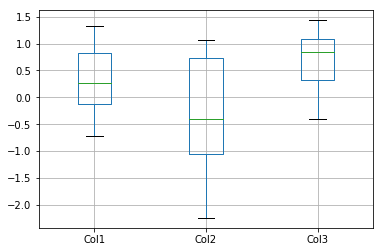

In [333]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4),
                columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

In [334]:
df

,Col1,Col2,Col3,Col4
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [332]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

boxplot
plt.show()

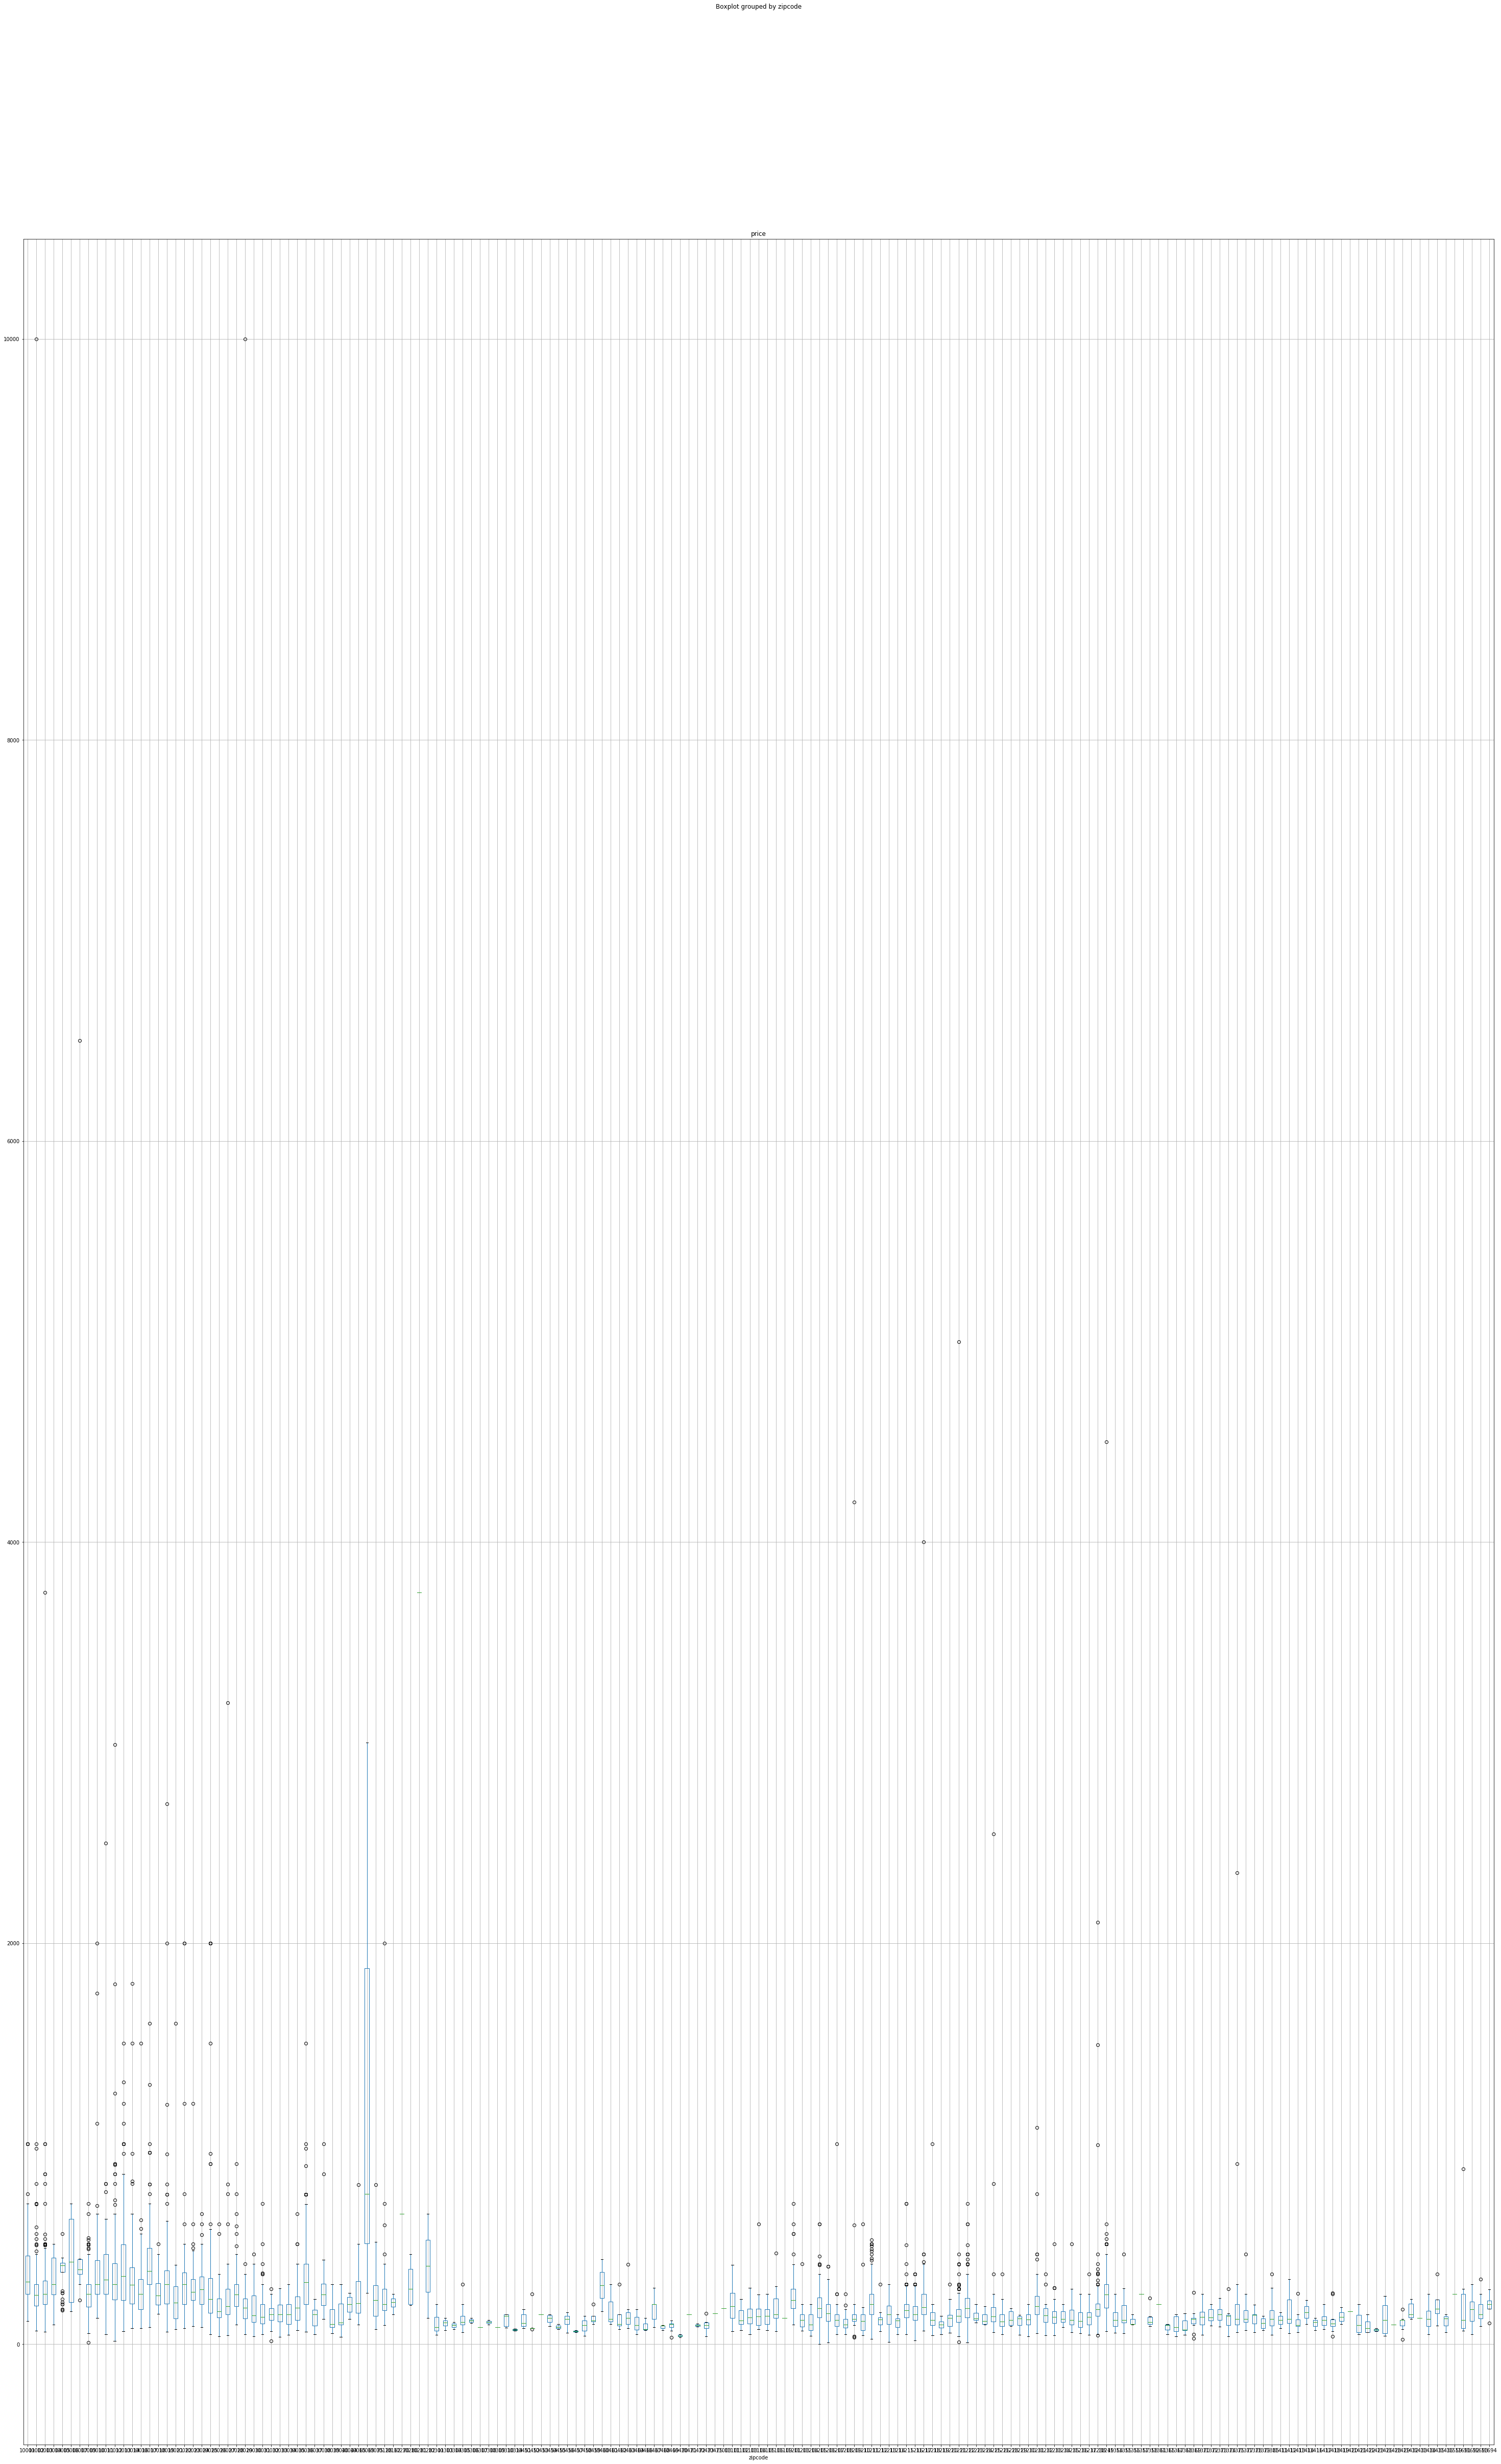

In [349]:
boxplot = revenue.boxplot(column=['price'], by='zipcode', figsize=(50,80))
plt.show()

In [335]:
revenue

,zipcode,price,boroughs,neighbourhoods,property_type,room_type,bathrooms
0,10029,190,Manhattan,East Harlem,Apartment,Entire home/apt,1.0
1,11221,115,Brooklyn,Bedford-Stuyvesant,Townhouse,Entire home/apt,1.0
2,11206,228,Brooklyn,Williamsburg,Loft,Entire home/apt,1.0
3,10001,375,Manhattan,Chelsea,Apartment,Entire home/apt,2.0
4,10162,250,Manhattan,Upper East Side,Apartment,Entire home/apt,1.0
5,11215,225,Brooklyn,Park Slope,Condominium,Entire home/apt,2.0
6,10075,200,Manhattan,Upper East Side,Apartment,Private room,1.0
7,11211,145,Brooklyn,Williamsburg,Apartment,Private room,1.0
8,10031,110,Manhattan,Harlem,Apartment,Entire home/apt,1.0
9,10002,285,Manhattan,Lower East Side,Apartment,Entire home/apt,1.0


In [263]:
cost

,zipcode,cost
0,10025,1431000
2,10023,2142300
13,10128,1787100
14,10011,2480400
20,10003,2147000
31,11201,1420700
51,11234,476900
67,10314,357300
70,11215,1070800
108,10028,2083900


In [268]:
profit.sort_values(by=['zipcode'])

,zipcode,price,boroughs,neighbourhoods,property_type,room_type,bathrooms,cost,ROI,Cap_Rate
5737,10001,195,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,53381.25,NaN
1413,10001,700,Manhattan,Chelsea,Condominium,Entire home/apt,2.0,NaN,191625.00,NaN
1292,10001,220,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,60225.00,NaN
209,10001,399,Manhattan,Chelsea,Loft,Entire home/apt,2.0,NaN,109226.25,NaN
4639,10001,288,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,78840.00,NaN
6383,10001,750,Manhattan,Chelsea,Apartment,Entire home/apt,1.5,NaN,205312.50,NaN
6124,10001,325,Manhattan,Chelsea,Condominium,Entire home/apt,1.0,NaN,88968.75,NaN
371,10001,595,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,162881.25,NaN
2173,10001,480,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,131400.00,NaN
5396,10001,149,Manhattan,Chelsea,Apartment,Entire home/apt,1.0,NaN,40788.75,NaN


In [278]:
test = profit.groupby('zipcode').mean()
test.isnull().sum()

price          0
bathrooms      0
cost         145
ROI            0
Cap_Rate     145
dtype: int64

In [310]:
profit.isnull().sum()

zipcode              0
price                0
boroughs             0
neighbourhoods       0
property_type        0
room_type            0
bathrooms            0
cost              4881
ROI                  0
Cap_Rate          4881
dtype: int64

In [315]:
tt = revenue.groupby('zipcode').first()
uu = pd.merge(tt, cost, on='zipcode',how='left')
uu.isnull().sum()

zipcode             0
price               0
boroughs            0
neighbourhoods      0
property_type       0
room_type           0
bathrooms           0
cost              144
dtype: int64

In [308]:
len(revenue.zipcode.unique())

169

In [309]:
len(profit)

6444

In [273]:
len(test)

169

In [281]:
cost.zipcode.unique()

array([10025, 10023, 10128, 10011, 10003, 11201, 11234, 10314, 11215,
       10028, 10021, 10014, 10036, 11434, 10306, 10312, 10022, 11217,
       10013, 11231, 10304, 10305, 10309, 10308, 10303])

In [282]:
revenue.zipcode.unique()

array([10029, 11221, 11206, 10001, 10162, 11215, 10075, 11211, 10031,
       10002, 11217, 11231, 11233, 10009, 10023, 11201, 11238, 11249,
       10027, 10039, 11385, 10013, 10011, 11222, 11216, 10032, 11205,
       10003, 10012, 10026, 10025, 10128, 10014, 11104, 10022, 11225,
       11101, 10038, 11213, 11106, 10016, 10036, 10463, 10065, 10024,
       10455, 10034, 11237, 10469, 11235, 10314, 10452, 11103, 11220,
       10004, 11226, 10282, 10019, 11377, 10033, 10021, 11230, 11214,
       10037, 10010, 11418, 10030, 10005, 10035, 11218, 11105, 11372,
       11207, 10028, 10017, 11208, 10040, 11412, 11367, 11374, 11209,
       11693, 10305, 11109, 10304, 11102, 11212, 11232, 11204, 10451,
       11369, 11234, 10473, 10301, 10044, 10018, 11236, 11203, 11373,
       10475, 11417, 10459, 10007, 11375, 10280, 10069, 11223, 11433,
       10454, 11692, 11365, 10308, 11210, 11426, 11423, 11434, 11228,
       10006, 11435, 11379, 11370, 11378, 11368, 10456, 11691, 10303,
       10460, 11422,

In [297]:
yy = zillow[['RegionName','2017-06']]
yy.columns = ['zipcode','cost']
yy

,zipcode,cost
0,10025,1431000
1,60657,385100
2,10023,2142300
3,60614,412200
4,79936,83700
5,60640,255100
6,94109,1245200
7,77494,231400
8,32162,198000
9,60647,331100


In [299]:
len(revenue)

6444

In [300]:
len(revenue.zipcode.unique())

169

In [301]:
len(cost.zipcode.unique())

25

In [298]:
yy.isnull().sum()

zipcode    0
cost       0
dtype: int64

In [287]:
uu = pd.merge(revenue, yy, on='zipcode',how='left')
uu.isnull().sum()

zipcode              0
price                0
boroughs             0
neighbourhoods       0
property_type        0
room_type            0
bathrooms            0
cost              4881
dtype: int64

In [295]:
yy = zillow.iloc[:,7:]

In [296]:
yy['cost'] = yy.apply(lambda row: row[''])

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,195800.0,193500.0,192600.0,192300.0,192600.0,193600.0,195500.0,197600.0,199400.0,201300.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,59100.0,60500.0,60900.0,60800.0,60300.0,60400.0,61200.0,61700.0,61000.0,60100.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700
5,123300.0,122600.0,122000.0,121500.0,120900.0,120600.0,120900.0,121300.0,121600.0,122100.0,...,247000,247300,248700,250800.0,252800,253800,253800,253400,254100,255100
6,336800.0,337400.0,337700.0,338200.0,339700.0,340400.0,339700.0,338900.0,338300.0,340000.0,...,1239400,1238800,1246800,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200
7,117300.0,117900.0,118800.0,121100.0,123200.0,124600.0,125800.0,126400.0,125600.0,125100.0,...,228100,229100,229600,229400.0,229500,230400,231400,231600,231300,231400
8,72600.0,74800.0,77300.0,80000.0,81700.0,82600.0,83500.0,84700.0,85100.0,84200.0,...,198000,197400,198100,199700.0,201400,202200,201900,200700,199100,198000
9,129600.0,129800.0,129900.0,130600.0,131100.0,131200.0,131000.0,131400.0,132000.0,132100.0,...,318100,320300,323100,324600.0,325700,326200,326500,327700,329900,331100


In [ ]:
def 

In [288]:
df = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 2, np.nan], [5, 6, np.nan]]), 
    columns=['a', 'b', 'c']
)
df['c'] = df.apply(
    lambda row: row['a']*row['b'] if np.isnan(row['c']) else row['c'],
    axis=1
)
df

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,20.0
2,7.0,8.0,9.0
3,3.0,2.0,6.0
4,5.0,6.0,30.0
